# Задача:

1. **Генерация выборок для различных распределений и вычисление доверительных интервалов:**

   - Сгенерировать выборки для следующих распределений: нормальное, Бернулли, Пуассона, экспоненциальное.
   - Вычислить доверительные интервалы для каждой выборки.

2. **Построение ядерной оценки плотности вероятности:**

   - Построить ядерную оценку плотности вероятности для нормального распределения \( N(3, 5) \) с прямоугольным и гауссовским ядром (за \( h \) принять \( h_{opt} \)).
   - Построить ядерную оценку плотности вероятности для равномерного распределения в интервале \( [3, 5] \) с прямоугольным и гауссовским ядром (за \( h \) принять \( h_{opt} \)).


# Решение (Python):

## Импорт библиотек

In [2]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

## Генерация выборок для каждого из распределений


In [3]:
# Генерация выборки для нормального распределения
normal_sample = np.random.normal(loc=0, scale=1, size=200)

# Генерация выборки для бернуллиевского распределения
bernoulli_sample = np.random.binomial(n=1, p=0.3, size=200)

bernoulli_sample50 = np.random.binomial(n=1, p=0.3, size=50)

# Генерация выборки для распределения Пуассона
poisson_sample = np.random.poisson(lam=2, size=200)

# Генерация выборки для экспоненциального распределения
exponential_sample = np.random.exponential(scale=2, size=200)

## Вычисление доверительных интервалов

In [6]:
# Функция для вычисления доверительного интервала для нормального распределения
def confidence_interval_normal(data, alpha=0.05):
    n = len(data)
    mean = np.mean(data)
    std_err = stats.sem(data)
    h = std_err * stats.t.ppf((1 + (1 - alpha)) / 2, n - 1)
    return mean - h, mean + h

# Функция для вычисления доверительного интервала дисперсии для нормального распределения
def confidence_interval_for_disp_normal(data, alpha=0.05):
    n = len(data)
    var = np.var(data, ddof=1)  # ddof=1 for unbiased estimator
    chi2_lower = stats.chi2.ppf(alpha / 2, n - 1)
    chi2_upper = stats.chi2.ppf(1 - alpha / 2, n - 1)
    lower = (n - 1) * var / chi2_upper
    upper = (n - 1) * var / chi2_lower
    return lower, upper
 
# Функция для вычисления доверительного интервала для биномиального распределения
def confidence_interval_bernoulli(data, alpha=0.05):
    n = len(data)
    p = np.mean(data)
    std_err = stats.sem(data)
    h = std_err * stats.norm.ppf((1 + (1 - alpha)) / 2)
    return p - h, p + h
 
# Функция для вычисления доверительного интервала для распределения Пуассона
def confidence_interval_poisson(data, alpha=0.05):
    n = len(data)
    mean = np.mean(data)
    std_err = np.sqrt(mean / n)
    h = std_err * stats.norm.ppf((1 + (1 - alpha)) / 2)
    return mean - h, mean + h

# Функция для вычисления доверительного интервала для экспоненциального распределения
def confidence_interval_exponential(data, alpha=0.05):
    n = len(data)
    mean = np.mean(data)
    std_err = mean / np.sqrt(n)
    h = std_err * stats.norm.ppf((1 + (1 - alpha)) / 2)
    return mean - h, mean + h

# Вычисление доверительных интервалов для каждого распределения
normal_ci = confidence_interval_normal(normal_sample)
bernoulli_ci = confidence_interval_bernoulli(bernoulli_sample)
bernoulli_ci50 = confidence_interval_bernoulli(bernoulli_sample50)
poisson_ci = confidence_interval_poisson(poisson_sample)
exponential_ci = confidence_interval_exponential(exponential_sample)

normal_ci_for_disp = confidence_interval_for_disp_normal(normal_sample)

In [11]:
print("Доверительный интервал среднего для нормального распределения:", normal_ci)
print("Доверительный интервал среднего для бернуллиевского распределения:", bernoulli_ci)
print("Доверительный интервал среднего для бернуллиевского распределения 2:", bernoulli_ci50)
print("Доверительный интервал среднего для распределения Пуассона:", poisson_ci)
print("Доверительный интервал среднего для экспоненциального распределения:", exponential_ci)
print(" ")
print("Доверительный интервал дисперсии для нормального распределения:", normal_ci_for_disp)

Доверительный интервал среднего для нормального распределения: (-0.1013075905225438, 0.17456461541284252)
Доверительный интервал среднего для бернуллиевского распределения: (0.2599248587091894, 0.3900751412908106)
Доверительный интервал среднего для бернуллиевского распределения 2: (0.15428262193316838, 0.40571737806683167)
Доверительный интервал среднего для распределения Пуассона: (1.851568770320509, 2.2484312296794906)
Доверительный интервал среднего для экспоненциального распределения: (1.729163707659986, 2.2855667350946596)
 
Доверительный интервал дисперсии для нормального распределения: (0.8115326889311754, 1.2033598206930358)


(array([ 4.,  8., 20., 51., 45., 40., 23.,  8.,  0.,  1.]),
 array([-8.3121001 , -6.37874038, -4.44538067, -2.51202095, -0.57866123,
         1.35469849,  3.28805821,  5.22141792,  7.15477764,  9.08813736,
        11.02149708]),
 <BarContainer object of 10 artists>)

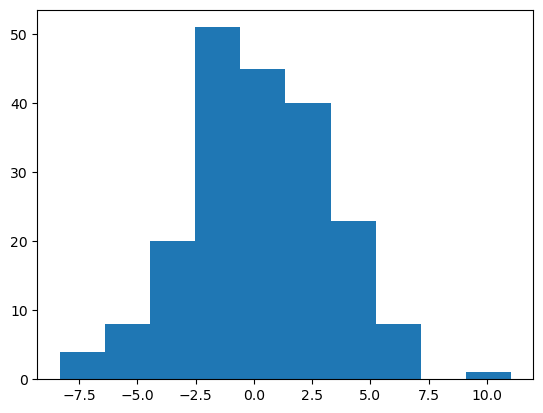

In [13]:
plt.hist(normal_sample)

In [8]:
vals = [10, 18, 31, 40, 52, 28, 15,  6]
bins = [-2.33469145, -1.74013038, -1.1455693 , -0.55100823,  0.04355285,
         0.63811392,  1.23267499,  1.82723607,  2.42179714]
group_data = []
for i in range(len(vals)):
    value = (bins[i] + bins[i+1]) / 2  # среднее значение внутри интервала
    group_data.extend([value])  # повторяем значение freq раз

In [15]:
grouped_normal_ci = confidence_interval_normal(group_data)
print("Доверительный интервал среднего для нормального распределения:", grouped_normal_ci)
print()

normal_ci_for_disp_disp = confidence_interval_for_disp_normal(group_data)
print("Доверительный интервал дисперсии для нормального распределения:", normal_ci_for_disp_disp)

Доверительный интервал среднего для нормального распределения: (-1.174003990811428, 1.261109682061428)

Доверительный интервал для нормального распределения: (0.9272053419875967, 8.785958549450108)


## Построение ядерной оценки плотности вероятности

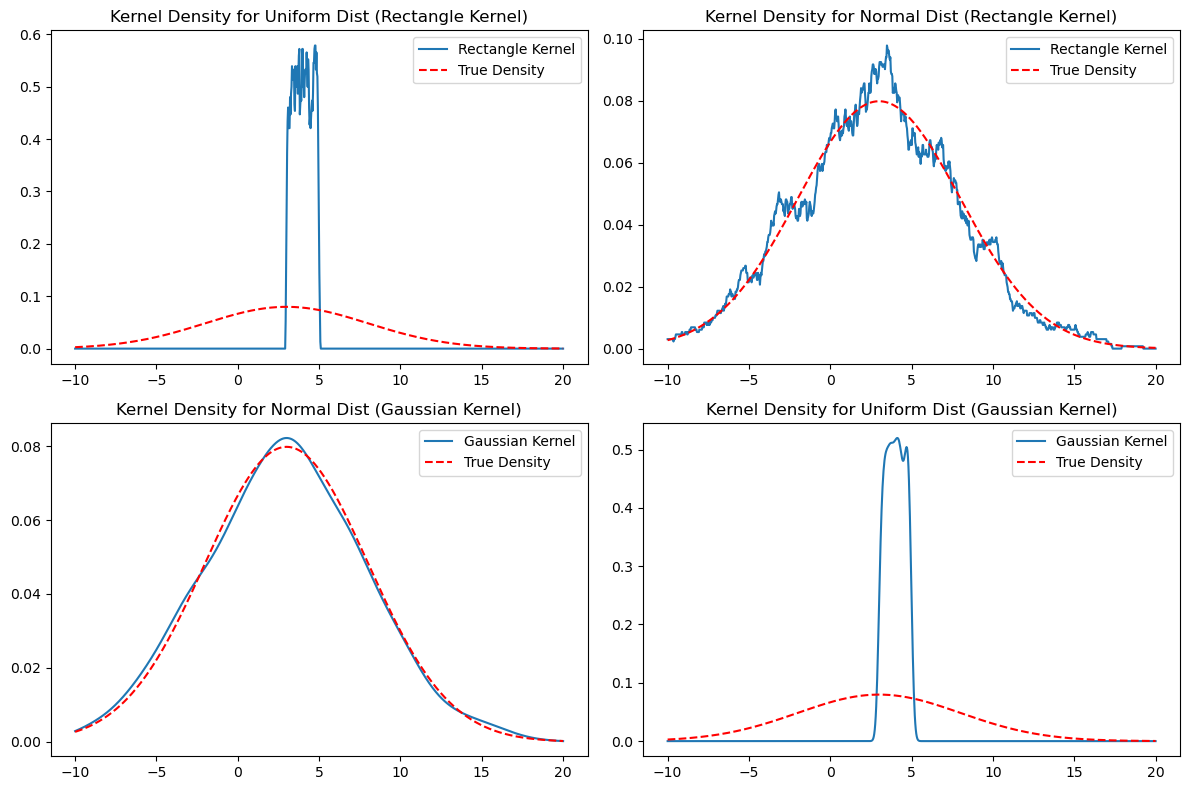

In [29]:
# Функция для вычисления оптимальной ширины окна h для ядерной оценки
def optimal_bandwidth(data):
    n = len(data)
    std_dev = np.std(data)
    return 1.06 * std_dev * (n ** (-0.2))

# Функция для вычисления ядерной оценки
def kernel_density_estimate(data, x_grid, bandwidth, kernel):
    kde = []
    for x in x_grid:
        if kernel == 'gaussian':
            kernel_vals = norm.pdf((x - data) / bandwidth) / bandwidth
        elif kernel == 'rectangle':
            kernel_vals = (np.abs((x - data) / bandwidth) <= 0.5) / bandwidth
        kde.append(np.mean(kernel_vals))
    return np.array(kde)

# Генерация выборки из нормального и равномерного распределений
normal_data = np.random.normal(loc=3, scale=5, size=1000)
uniform_data = np.random.uniform(low=3, high=5, size=1000)

# Вычисление оптимальной ширины окна h для нормальной выборки
h_opt_normal = optimal_bandwidth(normal_data)

# Вычисление оптимальной ширины окна h для равномерной выборки
h_opt_uniform = optimal_bandwidth(uniform_data)

# Создание сетки значений для построения графиков
x_grid = np.linspace(-10, 20, 1000)

# Вычисление ядерных оценок с прямоугольным и гауссовским ядрами для нормального распределения
kde_normal_rectangle = kernel_density_estimate(normal_data, x_grid, h_opt_normal, 'rectangle')
kde_normal_gaussian = kernel_density_estimate(normal_data, x_grid, h_opt_normal, 'gaussian')

# Вычисление ядерных оценок с прямоугольным и гауссовским ядрами для равномерного распределения
kde_uniform_rectangle = kernel_density_estimate(uniform_data, x_grid, h_opt_uniform, 'rectangle')
kde_uniform_gaussian = kernel_density_estimate(uniform_data, x_grid, h_opt_uniform, 'gaussian')

# Построение графиков
plt.figure(figsize=(12, 8))

# Ядерная оценка с прямоугольным ядром для равномерного распределения
plt.subplot(2, 2, 1)
plt.plot(x_grid, kde_uniform_rectangle, label='Rectangle Kernel')
plt.plot(x_grid, norm.pdf(x_grid, loc=3, scale=5), 'r--', label='True Density')
plt.title('Kernel Density for Uniform Dist (Rectangle Kernel)')
plt.legend()

# Ядерная оценка с прямоугольным ядром для нормального распределения
plt.subplot(2, 2, 2)
plt.plot(x_grid, kde_normal_rectangle, label='Rectangle Kernel')
plt.plot(x_grid, norm.pdf(x_grid, loc=3, scale=5), 'r--', label='True Density')
plt.title('Kernel Density for Normal Dist (Rectangle Kernel)')
plt.legend()

# Ядерная оценка с гауссовским ядром для нормального распределения
plt.subplot(2, 2, 3)
plt.plot(x_grid, kde_normal_gaussian, label='Gaussian Kernel')
plt.plot(x_grid, norm.pdf(x_grid, loc=3, scale=5), 'r--', label='True Density')
plt.title('Kernel Density for Normal Dist (Gaussian Kernel)')
plt.legend()

# Плотность вероятности равномерного распределения
plt.subplot(2, 2, 4)
plt.plot(x_grid, kde_uniform_gaussian, label='Gaussian Kernel')
plt.plot(x_grid, norm.pdf(x_grid, loc=3, scale=5), 'r--', label='True Density')
plt.title('Kernel Density for Uniform Dist (Gaussian Kernel)')
plt.legend()

plt.tight_layout()
plt.show()
